<a href="https://colab.research.google.com/github/Sidhi11/placement-prediction-/blob/main/Placement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/Placement_Data_Full_Class.csv')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.shape

(215, 15)

In [5]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [6]:
df.sample(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
76,77,F,66.5,Others,70.4,Central,Arts,71.93,Comm&Mgmt,No,61.0,Mkt&Fin,64.27,Placed,230000.0
214,215,M,62.0,Central,58.0,Others,Science,53.00,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN
142,143,M,85.0,Central,60.0,Others,Science,73.43,Sci&Tech,Yes,60.0,Mkt&Fin,61.29,Placed,260000.0
187,188,M,78.5,Central,65.5,Central,Science,67.00,Sci&Tech,Yes,95.0,Mkt&Fin,64.86,Placed,280000.0
138,139,F,82.0,Others,64.0,Others,Science,73.00,Sci&Tech,Yes,96.0,Mkt&Fin,71.77,Placed,250000.0


In [7]:
df.describe().loc[['mean', 'min', 'max']]

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
mean,108.0,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
min,1.0,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
max,215.0,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [9]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# **Encoding and Transforming**


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [12]:
df['gender'] = le.fit_transform(df['gender'])

In [13]:
df['ssc_b'] = le.fit_transform(df['ssc_b'])
df['hsc_b'] = le.fit_transform(df['hsc_b'])
df['hsc_s'] = le.fit_transform(df['hsc_s'])
df['degree_t'] = le.fit_transform(df['degree_t'])
df['specialisation'] = le.fit_transform(df['specialisation'])
df['status'] = le.fit_transform(df['status'])

In [16]:
df['workex'] = le.fit_transform(df['workex'])

In [17]:
df['salary']= df['salary'].fillna(df['salary'].mean())

# **Plotting**

In [88]:
import plotly.express as px
px.pie(df,names="hsc_s")

In [90]:
px.scatter_3d(df,x="ssc_p",y="hsc_p",z="degree_p",color="status")


<ipython-input-79-3bccae1a8f8e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="viridis")


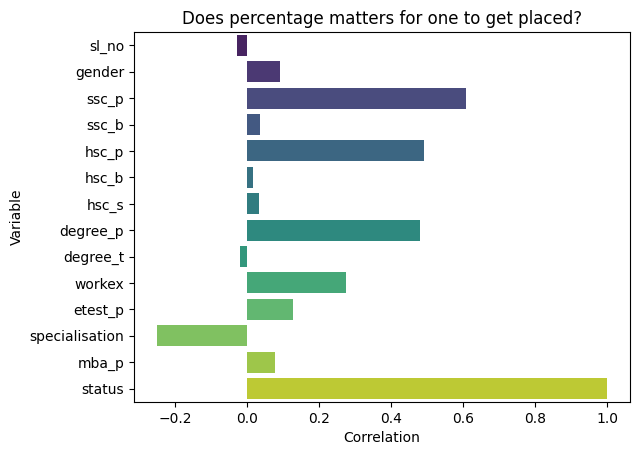

In [79]:
corr = df.corr(numeric_only=True)["status"][:-1]

sns.barplot(x=corr.values, y=corr.index, palette="viridis")
plt.title("Does percentage matters for one to get placed?")
plt.xlabel("Correlation")
plt.ylabel("Variable")
plt.show()

<Axes: >

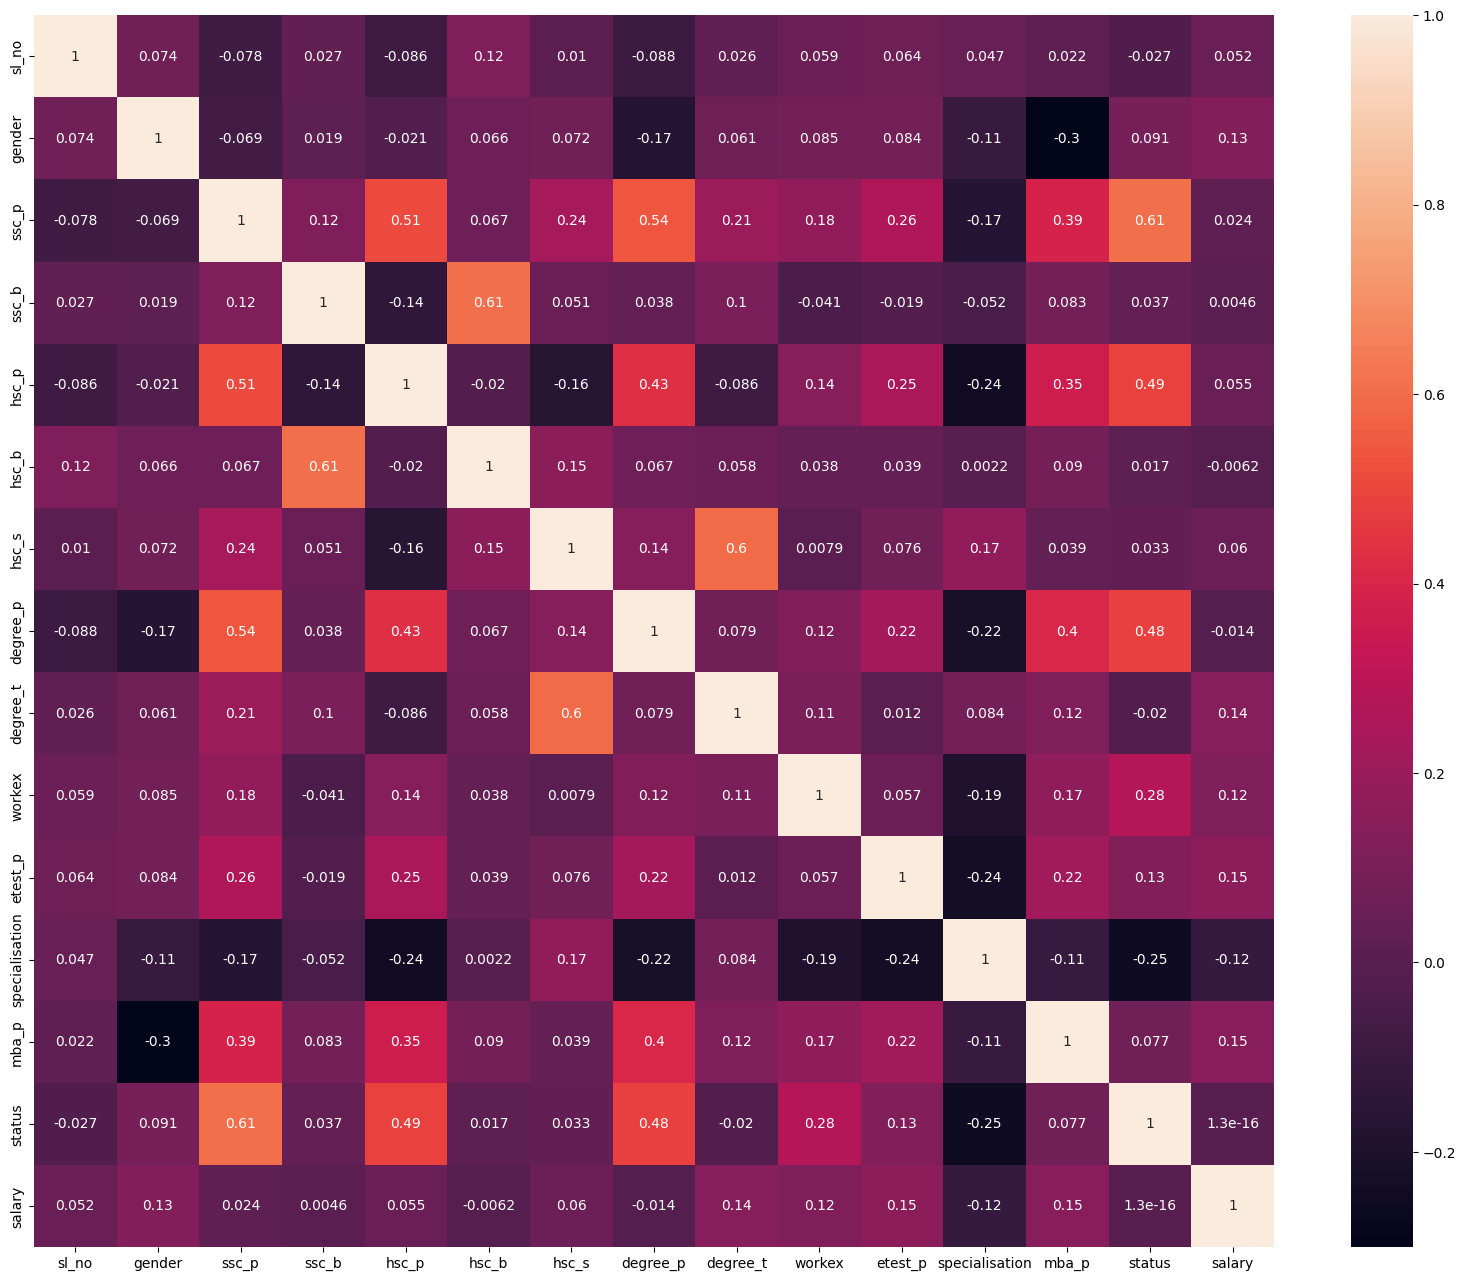

In [77]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# **Modeling The Data** **(70-30)**

In [19]:
X = df.drop('status',axis=1)
y = df['status']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=7)

# **Model - 1 Logistic Regression**


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error,confusion_matrix,classification_report

In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [23]:
y_pred = model.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred)}\n\n\n")
print(f"Accuraccy Precent is: \n {accuracy_score(y_test,y_pred)*100}\n\n\n")

Confusion Matrix is: 
 [[10 10]
 [ 5 40]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.67      0.50      0.57        20
           1       0.80      0.89      0.84        45

    accuracy                           0.77        65
   macro avg       0.73      0.69      0.71        65
weighted avg       0.76      0.77      0.76        65




Accuraccy Precent is: 
 76.92307692307693





# **Model - 2 Random Forest Classifier**

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
y_pred = model.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred)}\n\n\n")
print(f"Accuraccy Precent is: \n {accuracy_score(y_test,y_pred)*100}\n\n\n")

Confusion Matrix is: 
 [[16  4]
 [ 1 44]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.92      0.98      0.95        45

    accuracy                           0.92        65
   macro avg       0.93      0.89      0.91        65
weighted avg       0.92      0.92      0.92        65




Accuraccy Precent is: 
 92.3076923076923





# **Model - 3 Decision Tree**

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
y_pred = model.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred)}\n\n\n")
print(f"Accuraccy Precent is: \n {accuracy_score(y_test,y_pred)*100}\n\n\n")

Confusion Matrix is: 
 [[16  4]
 [ 1 44]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.92      0.98      0.95        45

    accuracy                           0.92        65
   macro avg       0.93      0.89      0.91        65
weighted avg       0.92      0.92      0.92        65




Accuraccy Precent is: 
 92.3076923076923





# **Model - 4 KNeighbor(KNN)**

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
y_pred = model.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred)}\n\n\n")
print(f"Accuraccy Precent is: \n {accuracy_score(y_test,y_pred)*100}\n\n\n")

Confusion Matrix is: 
 [[20  0]
 [ 2 43]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.96      0.98        45

    accuracy                           0.97        65
   macro avg       0.95      0.98      0.96        65
weighted avg       0.97      0.97      0.97        65




Accuraccy Precent is: 
 96.92307692307692





# **Model - 5 Naive Bayes**

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [34]:
y_pred = model.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred)}\n\n\n")
print(f"Accuraccy Precent is: \n {accuracy_score(y_test,y_pred)*100}\n\n\n")

Confusion Matrix is: 
 [[20  0]
 [ 0 45]]



Classification Report is 
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        45

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65




Accuraccy Precent is: 
 100.0





# **Modeling The Data** **(80-20)**

In [35]:
X = df.drop('status',axis=1)
y = df['status']

In [36]:
from sklearn.model_selection import train_test_split


In [37]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=8)

# **Model - 1 Logistic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error,confusion_matrix,classification_report

In [39]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [40]:
y_pred = model.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred)}\n\n\n")
print(f"Accuraccy Precent is: \n {accuracy_score(y_test,y_pred)*100}\n\n\n")

Confusion Matrix is: 
 [[12  3]
 [ 1 27]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.90      0.96      0.93        28

    accuracy                           0.91        43
   macro avg       0.91      0.88      0.89        43
weighted avg       0.91      0.91      0.91        43




Accuraccy Precent is: 
 90.69767441860465





# **Model - 2 Random Forest Classifier**

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
y_pred = model.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred)}\n\n\n")
print(f"Accuraccy Precent is: \n {accuracy_score(y_test,y_pred)*100}\n\n\n")

Confusion Matrix is: 
 [[11  4]
 [ 0 28]]



Classification Report is 
:               precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.88      1.00      0.93        28

    accuracy                           0.91        43
   macro avg       0.94      0.87      0.89        43
weighted avg       0.92      0.91      0.90        43




Accuraccy Precent is: 
 90.69767441860465





# **Model - 3 Decision Tree**

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred = model.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred)}\n\n\n")
print(f"Accuraccy Precent is: \n {accuracy_score(y_test,y_pred)*100}\n\n\n")

Confusion Matrix is: 
 [[11  4]
 [ 0 28]]



Classification Report is 
:               precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.88      1.00      0.93        28

    accuracy                           0.91        43
   macro avg       0.94      0.87      0.89        43
weighted avg       0.92      0.91      0.90        43




Accuraccy Precent is: 
 90.69767441860465





# **Model - 4 KNeighbor(KNN)**

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [49]:

y_pred = model.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred)}\n\n\n")
print(f"Accuraccy Precent is: \n {accuracy_score(y_test,y_pred)*100}\n\n\n")

Confusion Matrix is: 
 [[15  0]
 [ 0 28]]



Classification Report is 
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        28

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43




Accuraccy Precent is: 
 100.0





# **Model - 5 Naive Bayes**

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [52]:
y_pred = model.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred)}\n\n\n")
print(f"Accuraccy Precent is: \n {accuracy_score(y_test,y_pred)*100}\n\n\n")

Confusion Matrix is: 
 [[15  0]
 [ 0 28]]



Classification Report is 
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        28

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43




Accuraccy Precent is: 
 100.0





# **Modeling The Data** **(75-25)**

In [55]:
X = df.drop('status',axis=1)
y = df['status']

In [54]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=75)

# **Model - 1 Logistic Regression**

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error,confusion_matrix,classification_report

In [61]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [62]:
y_pred = model.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred)}\n\n\n")
print(f"Accuraccy Precent is: \n {accuracy_score(y_test,y_pred)*100}\n\n\n")

Confusion Matrix is: 
 [[ 1 17]
 [ 1 35]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.50      0.06      0.10        18
           1       0.67      0.97      0.80        36

    accuracy                           0.67        54
   macro avg       0.59      0.51      0.45        54
weighted avg       0.62      0.67      0.56        54




Accuraccy Precent is: 
 66.66666666666666





# **Model - 2 Random Forest Classifier**

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
y_pred = model.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred)}\n\n\n")
print(f"Accuraccy Precent is: \n {accuracy_score(y_test,y_pred)*100}\n\n\n")

Confusion Matrix is: 
 [[17  1]
 [ 0 36]]



Classification Report is 
:               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.97      1.00      0.99        36

    accuracy                           0.98        54
   macro avg       0.99      0.97      0.98        54
weighted avg       0.98      0.98      0.98        54




Accuraccy Precent is: 
 98.14814814814815





# **Model - 3 Decision Tree**

In [68]:
from sklearn.tree import DecisionTreeClassifier


In [67]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
y_pred = model.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred)}\n\n\n")
print(f"Accuraccy Precent is: \n {accuracy_score(y_test,y_pred)*100}\n\n\n")

Confusion Matrix is: 
 [[17  1]
 [ 0 36]]



Classification Report is 
:               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.97      1.00      0.99        36

    accuracy                           0.98        54
   macro avg       0.99      0.97      0.98        54
weighted avg       0.98      0.98      0.98        54




Accuraccy Precent is: 
 98.14814814814815





# **Model - 4 KNeighbor(KNN)**

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [71]:
y_pred = model.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred)}\n\n\n")
print(f"Accuraccy Precent is: \n {accuracy_score(y_test,y_pred)*100}\n\n\n")

Confusion Matrix is: 
 [[18  0]
 [ 1 35]]



Classification Report is 
:               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.97      0.99        36

    accuracy                           0.98        54
   macro avg       0.97      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54




Accuraccy Precent is: 
 98.14814814814815





# **Model - 5 Naive Bayes**

In [72]:
from sklearn.naive_bayes import GaussianNB

In [74]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [76]:
y_pred = model.predict(X_test)
print(f"Confusion Matrix is: \n {confusion_matrix(y_test,y_pred)}\n\n\n")
print(f"Classification Report is \n: {classification_report(y_test,y_pred)}\n\n\n")
print(f"Accuraccy Precent is: \n {accuracy_score(y_test,y_pred)*100}\n\n\n")

Confusion Matrix is: 
 [[18  0]
 [ 0 36]]



Classification Report is 
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        36

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54




Accuraccy Precent is: 
 100.0



